In [1]:
import pyfits
import matplotlib.pyplot as plt
import numpy as np

# Test Calibration

In [2]:
f = pyfits.open('Calibratetest.fits')
firstPolar = f[1].data['auto0_real']
#plt.plot(firstPolar)
#plt.show()

In [3]:
online = np.array([])
for i in range (1,11):
    online = np.append(online, f[i].data['auto0_real'])

In [4]:
online.shape = (10,-1)

In [5]:
e = online.mean(0)

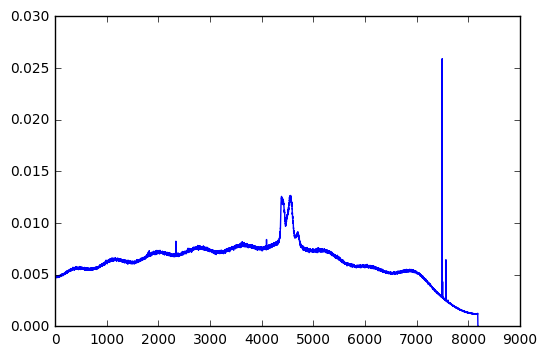

In [6]:
plt.plot(e)
plt.show()

# Upper and Lower Calibrations

In [7]:
upper = pyfits.open('Calibrateupper.fits')
lower = pyfits.open('Calibratelower.fits')
Up = np.array([])
Low = np.array([])
for i in range (1,11):
    Up = np.append(Up, upper[i].data['auto0_real'])
    Low = np.append(Low, lower[i].data['auto0_real'])
Up.shape = (10,-1)
Low.shape = (10,-1)

UpAvg = Up.mean(0)
LowAvg = Low.mean(0)

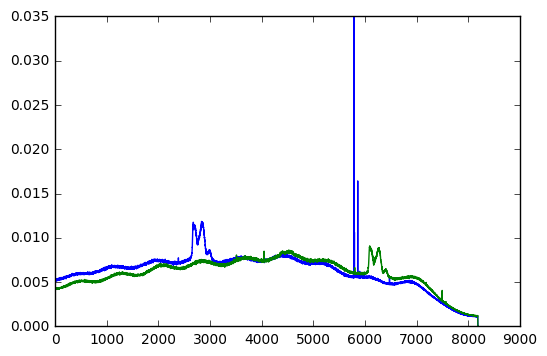

In [8]:
plt.plot(UpAvg)
plt.plot(LowAvg)
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


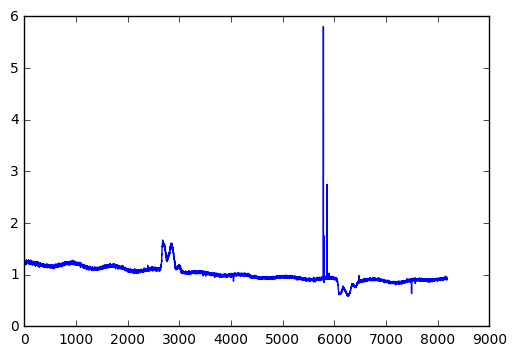

In [9]:
plt.plot(UpAvg/LowAvg)
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in divide


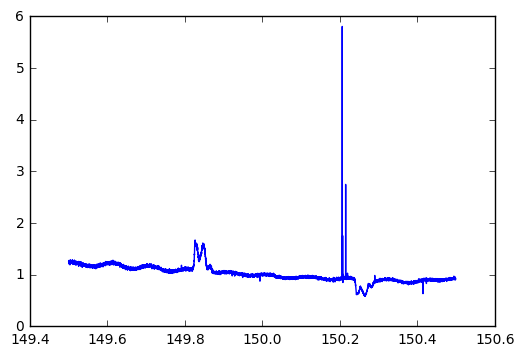

In [21]:
timestep = 1
freqs = np.fft.fftfreq(len(UpAvg),timestep)+150

plt.plot(freqs,np.fft.fftshift(UpAvg/LowAvg))
plt.show()